In [2]:
import xarray as xr
import numpy as np
import glob as glob
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.mpl.ticker as cticker

In [19]:

list_files2 = glob.glob("/cluster/work/users/a2021/archive/NSSP534frc2esm_f19_tn14_testCCS_2081/lnd/hist/NSSP534frc2esm_f19_tn14_testCCS_2081.clm2.h0.2080*.nc")
list_files2 = sorted(list_files2)
print(list_files2)
size_iteration = len(list_files2)
print(size_iteration)
total_NPP = 0
total_AGNPP = 0
for i in range(size_iteration):
    dset_case2 = xr.open_dataset(list_files2[i], decode_times=False)
    NPP=dset_case2['NPP'].sum(dim='time')
    AGNPP=dset_case2['AGNPP'].sum(dim='time')
    total_NPP += NPP
    total_AGNPP += AGNPP
npp_data_positive = xr.where(NPP < 0, 0, NPP)
agnpp_data_positive = xr.where(AGNPP < 0, 0, AGNPP)
    
percentage_agnpp = (AGNPP / NPP) * 100

print(percentage_agnpp.mean()) 
#NPP.plot()

['/cluster/work/users/a2021/archive/NSSP534frc2esm_f19_tn14_testCCS_2081/lnd/hist/NSSP534frc2esm_f19_tn14_testCCS_2081.clm2.h0.2080-01.nc', '/cluster/work/users/a2021/archive/NSSP534frc2esm_f19_tn14_testCCS_2081/lnd/hist/NSSP534frc2esm_f19_tn14_testCCS_2081.clm2.h0.2080-02.nc', '/cluster/work/users/a2021/archive/NSSP534frc2esm_f19_tn14_testCCS_2081/lnd/hist/NSSP534frc2esm_f19_tn14_testCCS_2081.clm2.h0.2080-03.nc', '/cluster/work/users/a2021/archive/NSSP534frc2esm_f19_tn14_testCCS_2081/lnd/hist/NSSP534frc2esm_f19_tn14_testCCS_2081.clm2.h0.2080-04.nc', '/cluster/work/users/a2021/archive/NSSP534frc2esm_f19_tn14_testCCS_2081/lnd/hist/NSSP534frc2esm_f19_tn14_testCCS_2081.clm2.h0.2080-05.nc', '/cluster/work/users/a2021/archive/NSSP534frc2esm_f19_tn14_testCCS_2081/lnd/hist/NSSP534frc2esm_f19_tn14_testCCS_2081.clm2.h0.2080-06.nc', '/cluster/work/users/a2021/archive/NSSP534frc2esm_f19_tn14_testCCS_2081/lnd/hist/NSSP534frc2esm_f19_tn14_testCCS_2081.clm2.h0.2080-07.nc', '/cluster/work/users/a2021

In [8]:
list_files2[0]

'/cluster/work/users/a2021/archive/NSSP534frc2esm_f19_tn14_testCCS_2081/lnd/hist/NSSP534frc2esm_f19_tn14_testCCS_2081.clm2.h0.2080-01.nc'

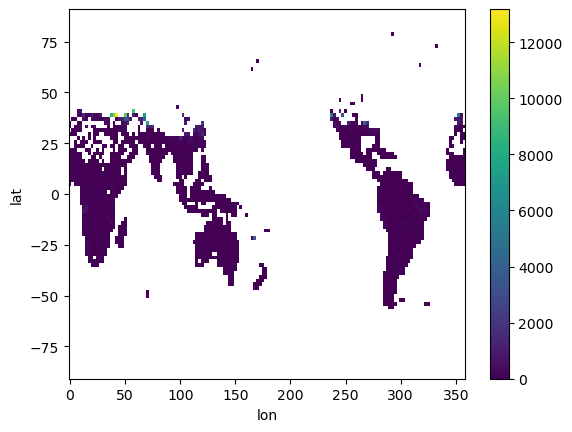

In [57]:
percentage_agnpp = (agnpp_data_positive / npp_data_positive) * 100

percentage_agnpp.plot()



#Check the number of active crops in the compset

In [33]:
list_files2 = ["/cluster/work/users/a2021/archive/NSSP534frc2esm_f19_tn14_testCCS_2081/lnd/hist/NSSP534frc2esm_f19_tn14_testCCS_2081.clm2.h0.2080-04.nc"]
dset_case2 = xr.open_dataset(list_files2[0], decode_times=False)
a=dset_case2['PCT_CFT'].sum(['lat','lon']).isel(time=0)
nonzero_index = np.argwhere(a.values != 0)
print(len(nonzero_index))
#print(dset_case2['PCT_CFT'])
a=(dset_case2['AGNPP']/dset_case2['NPP'])*100
a.mean()

17


<xarray.DataArray ()>
array(279.10916701)

In [9]:
dset_case2['NPP']
dset_case2['AGNPP']

<xarray.DataArray 'AGNPP' (time: 1, lat: 96, lon: 144)>
[13824 values with dtype=float64]
Coordinates:
  * time     (time) float64 90.0
  * lon      (lon) float64 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
  * lat      (lat) float64 -90.0 -88.11 -86.21 -84.32 ... 84.32 86.21 88.11 90.0
Attributes:
    long_name:     aboveground NPP
    units:         gC/m^2/s
    cell_methods:  time: mean

In [3]:
list_files1 = ["/cluster/work/users/a2021/archive/NSSP534frc2esm_f19_tn14_rest_100223/atm/hist/NSSP534frc2esm_f19_tn14_rest_100223.cam.h0.2015-01.nc"]
dset_case = xr.open_dataset(list_files1[0], decode_times=False)
list_files2 = ["/cluster/work/users/a2021/archive/NSSP534frc2esm_f19_tn14_1605/lnd/hist/NSSP534frc2esm_f19_tn14_1605.clm2.h0.2080-03.nc"]
dset_case2 = xr.open_dataset(list_files2[0], decode_times=False)
lon,lat, area_grid =dset_case2['lat'],dset_case2['lon'], dset_case2['area']





fig, axs = plt.subplots(figsize=(8,6), subplot_kw={'projection': ccrs.PlateCarree()})
dset_case['TREFHT'].plot(cmap='jet')
axs.coastlines(linewidth=1)

a=float(np.sum(np.multiply(dset_case['TREFHT'], area_grid)/np.sum(area_grid)))
print(a)
plt.text(0.8, -0.3, float(np.sum(np.multiply(dset_case['TREFHT'], area_grid)/np.sum(area_grid))), fontsize=10, color='k', ha='center', va='top',transform=plt.gca().transAxes);
    #a[i]=float(np.sum(np.multiply(dset_case2[i], area_grid)/np.sum(area_grid)))
axs.set_xticks(np.arange(-180,181,60), crs=ccrs.PlateCarree())
lon_formatter = cticker.LongitudeFormatter()
axs.xaxis.set_major_formatter(lon_formatter)
axs.set_yticks(np.arange(-90,91,30), crs=ccrs.PlateCarree())
lat_formatter = cticker.LatitudeFormatter()
axs.yaxis.set_major_formatter(lat_formatter) 
axs.set_title(f'TREFHT', fontsize=16, loc='center')
fig.tight_layout()




FileNotFoundError: [Errno 2] No such file or directory: b'/cluster/work/users/a2021/archive/NSSP534frc2esm_f19_tn14_rest_100223/atm/hist/NSSP534frc2esm_f19_tn14_rest_100223.cam.h0.2015-01.nc'

In [21]:
dset_case=dset_case.assign_coords(lat=dset_case2['lat'].values) # changing the lat lon names and values of output variable to input variables
dset_case=dset_case2.assign_coords(lon=dset_case2['lon'].values)
#dset_case2 = dset_case2.rename({'lat': 'lsmlat', 'lon': 'lsmlon'})
dset_case

In [38]:
a=dset_case['TREFHT'].mean()
b=np.multiply(dset_case['TREFHT'], np.array(area_grid))/np.sum(np.array(area_grid))
print(a)
print(b)


<xarray.DataArray 'TREFHT' ()>
array(277.51062, dtype=float32)
<xarray.DataArray 'TREFHT' (time: 1, lat: 96, lon: 144)>
array([[[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]]])
Coordinates:
  * lat      (lat) float64 -90.0 -88.11 -86.21 -84.32 ... 84.32 86.21 88.11 90.0
  * lon      (lon) float64 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
  * time     (time) float64 31.0


In [14]:
print(dset_case2.lon)

<xarray.DataArray 'lon' (lon: 144)>
array([  0. ,   2.5,   5. ,   7.5,  10. ,  12.5,  15. ,  17.5,  20. ,  22.5,
        25. ,  27.5,  30. ,  32.5,  35. ,  37.5,  40. ,  42.5,  45. ,  47.5,
        50. ,  52.5,  55. ,  57.5,  60. ,  62.5,  65. ,  67.5,  70. ,  72.5,
        75. ,  77.5,  80. ,  82.5,  85. ,  87.5,  90. ,  92.5,  95. ,  97.5,
       100. , 102.5, 105. , 107.5, 110. , 112.5, 115. , 117.5, 120. , 122.5,
       125. , 127.5, 130. , 132.5, 135. , 137.5, 140. , 142.5, 145. , 147.5,
       150. , 152.5, 155. , 157.5, 160. , 162.5, 165. , 167.5, 170. , 172.5,
       175. , 177.5, 180. , 182.5, 185. , 187.5, 190. , 192.5, 195. , 197.5,
       200. , 202.5, 205. , 207.5, 210. , 212.5, 215. , 217.5, 220. , 222.5,
       225. , 227.5, 230. , 232.5, 235. , 237.5, 240. , 242.5, 245. , 247.5,
       250. , 252.5, 255. , 257.5, 260. , 262.5, 265. , 267.5, 270. , 272.5,
       275. , 277.5, 280. , 282.5, 285. , 287.5, 290. , 292.5, 295. , 297.5,
       300. , 302.5, 305. , 307.5, 310. 

In [13]:
print(dset_case.lon)

<xarray.DataArray 'lon' (lon: 144)>
array([  0. ,   2.5,   5. ,   7.5,  10. ,  12.5,  15. ,  17.5,  20. ,  22.5,
        25. ,  27.5,  30. ,  32.5,  35. ,  37.5,  40. ,  42.5,  45. ,  47.5,
        50. ,  52.5,  55. ,  57.5,  60. ,  62.5,  65. ,  67.5,  70. ,  72.5,
        75. ,  77.5,  80. ,  82.5,  85. ,  87.5,  90. ,  92.5,  95. ,  97.5,
       100. , 102.5, 105. , 107.5, 110. , 112.5, 115. , 117.5, 120. , 122.5,
       125. , 127.5, 130. , 132.5, 135. , 137.5, 140. , 142.5, 145. , 147.5,
       150. , 152.5, 155. , 157.5, 160. , 162.5, 165. , 167.5, 170. , 172.5,
       175. , 177.5, 180. , 182.5, 185. , 187.5, 190. , 192.5, 195. , 197.5,
       200. , 202.5, 205. , 207.5, 210. , 212.5, 215. , 217.5, 220. , 222.5,
       225. , 227.5, 230. , 232.5, 235. , 237.5, 240. , 242.5, 245. , 247.5,
       250. , 252.5, 255. , 257.5, 260. , 262.5, 265. , 267.5, 270. , 272.5,
       275. , 277.5, 280. , 282.5, 285. , 287.5, 290. , 292.5, 295. , 297.5,
       300. , 302.5, 305. , 307.5, 310. 

In [75]:
lat = np.radians(dset_case2['lat'])
lon = np.radians(dset_case2['lon'])
dlat = np.diff(lat)
dlat = np.append(dlat, dlat[-1])  # add the last latitude difference to complete the array shape
dlon = np.diff(lon)
dlat_2d, dlon_2d = np.meshgrid(dlat, dlon)
cell_area = R**2 * np.abs(np.sin(dlat_2d/2)) * dlon_2d
#ds['cell_area'] = (('lat', 'lon'), cell_area)
cell_area

array([[2.92825618e+10, 2.92825618e+10, 2.92825618e+10, ...,
        2.92825618e+10, 2.92825618e+10, 2.92825618e+10],
       [2.92825618e+10, 2.92825618e+10, 2.92825618e+10, ...,
        2.92825618e+10, 2.92825618e+10, 2.92825618e+10],
       [2.92825618e+10, 2.92825618e+10, 2.92825618e+10, ...,
        2.92825618e+10, 2.92825618e+10, 2.92825618e+10],
       ...,
       [2.92825618e+10, 2.92825618e+10, 2.92825618e+10, ...,
        2.92825618e+10, 2.92825618e+10, 2.92825618e+10],
       [2.92825618e+10, 2.92825618e+10, 2.92825618e+10, ...,
        2.92825618e+10, 2.92825618e+10, 2.92825618e+10],
       [2.92825618e+10, 2.92825618e+10, 2.92825618e+10, ...,
        2.92825618e+10, 2.92825618e+10, 2.92825618e+10]])

In [76]:
#b=np.multiply(dset_case['TREFHT'], np.array(cell_area))/np.sum(np.array(cell_area))
area_grid

<xarray.DataArray 'area' (lat: 96, lon: 144)>
array([[ 242.1114  ,  242.1114  ,  242.1114  , ...,  242.1114  ,  242.1114  ,
         242.1114  ],
       [1936.494039, 1936.494039, 1936.494039, ..., 1936.494039, 1936.494039,
        1936.494039],
       [3870.870563, 3870.870563, 3870.870563, ..., 3870.870563, 3870.870563,
        3870.870563],
       ...,
       [        nan,         nan,         nan, ...,         nan,         nan,
                nan],
       [        nan,         nan,         nan, ...,         nan,         nan,
                nan],
       [        nan,         nan,         nan, ...,         nan,         nan,
                nan]])
Coordinates:
  * lon      (lon) float64 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
  * lat      (lat) float64 -90.0 -88.11 -86.21 -84.32 ... 84.32 86.21 88.11 90.0
Attributes:
    long_name:  grid cell areas
    units:      km^2

In [65]:
dset_case2['lat'].equals(dset_case['lat'])

False

<xarray.DataArray 'TSA' ()>
array(234.65842589) <xarray.DataArray 'TSA' ()>
array(309.2990164)
<xarray.DataArray 'TV' ()>
array(237.37809245) <xarray.DataArray 'TV' ()>
array(314.29866143)


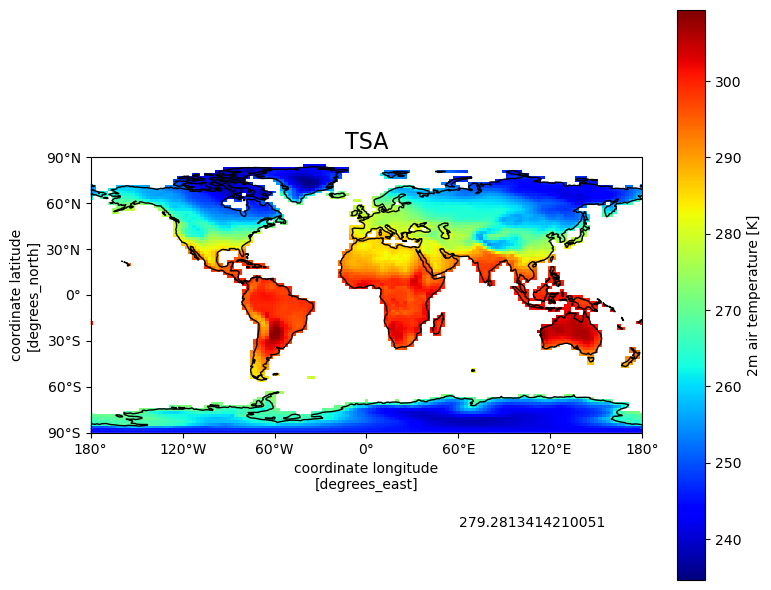

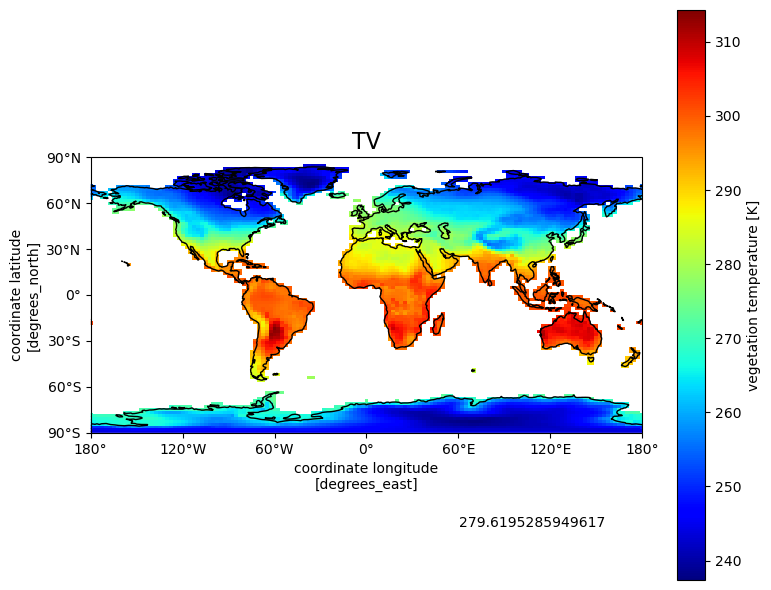

In [39]:
list_files2 = ["/cluster/work/users/a2021/archive/NSSP534frc2esm_f19_tn14_rest_100223/lnd/hist/NSSP534frc2esm_f19_tn14_rest_100223.clm2.h0.2015-01.nc"]
dset_case2 = xr.open_dataset(list_files2[0], decode_times=False)
lon,lat, area_grid =dset_case2['lat'],dset_case2['lon'], dset_case2['area']
variables = [ 'TSA', 'TV']#[ 'NEE', 'GPP', 'NBP', 'NPP','TV','TLAI', 'TSA', 'TOTVEGC','FPSN','STORVEGC','STORVEGN','DISPVEGN']
for i in variables:
    a=float(np.sum(np.multiply(dset_case2[i], area_grid)/np.sum(area_grid)))
    #print(float(np.sum(np.multiply(dset_case2[i], area_grid)/np.sum(area_grid))))
    print(dset_case2[i].min(),  dset_case2[i].max())
    fig, axs = plt.subplots(figsize=(8,6), subplot_kw={'projection': ccrs.PlateCarree()})
    b=dset_case2[i].plot(cmap='jet', vmin=dset_case2[i].min(), vmax= dset_case2[i].max())
    axs.coastlines(linewidth=1)
    plt.text(0.8, -0.3, float(np.sum(np.multiply(dset_case2[i], area_grid)/np.sum(area_grid))), fontsize=10, color='k', ha='center', va='top',transform=plt.gca().transAxes);
    #a[i]=float(np.sum(np.multiply(dset_case2[i], area_grid)/np.sum(area_grid)))
    axs.set_xticks(np.arange(-180,181,60), crs=ccrs.PlateCarree())
    lon_formatter = cticker.LongitudeFormatter()
    axs.xaxis.set_major_formatter(lon_formatter)
    axs.set_yticks(np.arange(-90,91,30), crs=ccrs.PlateCarree())
    lat_formatter = cticker.LatitudeFormatter()
    axs.yaxis.set_major_formatter(lat_formatter) 
    axs.set_title(f'{i}', fontsize=16, loc='center')
       
    fig.tight_layout()

<xarray.DataArray ()>
array(0.)
2.0291012338985706e-07


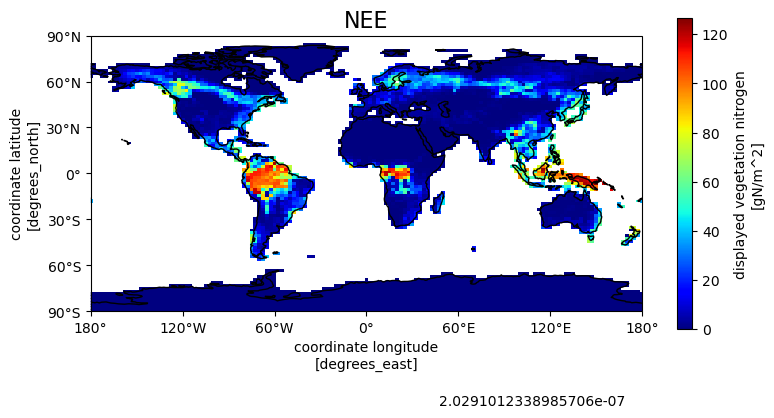

In [3]:
#np.multiply(dset_case2['NEE'], area_grid)/np.sum(area_grid)

#(np.multiply(dset_case2[i], area_grid)/np.sum(area_grid)).plot(cmap='jet')
vmin=(np.multiply(dset_case2['NEE'], area_grid)/np.sum(area_grid)).min()
vmax=(np.multiply(dset_case2['NEE'], area_grid)/np.sum(area_grid)).max()
fig, axs = plt.subplots(figsize=(8,4), subplot_kw={'projection': ccrs.PlateCarree()})
#(np.multiply(dset_case2['NEE'], area_grid)/np.sum(area_grid)).plot(cmap='jet',vmin=vmin,vmax=vmax)
dset_case2[i].plot(cmap='jet', vmin=dset_case2[i].min(), vmax= dset_case2[i].max())

axs.coastlines(linewidth=1)
plt.text(0.8, -0.3, float(np.sum(np.multiply(dset_case2['NEE'], area_grid)/np.sum(area_grid))), fontsize=10, color='k', ha='center', va='top',transform=plt.gca().transAxes);
axs.set_xticks(np.arange(-180,181,60), crs=ccrs.PlateCarree())
lon_formatter = cticker.LongitudeFormatter()
axs.xaxis.set_major_formatter(lon_formatter)
axs.set_yticks(np.arange(-90,91,30), crs=ccrs.PlateCarree())
lat_formatter = cticker.LatitudeFormatter()
axs.yaxis.set_major_formatter(lat_formatter) 
axs.set_title('NEE', fontsize=16, loc='center')      
fig.tight_layout()

print(np.sum(np.multiply(dset_case2['NEE'], area_grid)/np.sum(area_grid)).round(decimals = 2))
print(float(np.sum(np.multiply(dset_case2['NEE'], area_grid)/np.sum(area_grid))))

<xarray.DataArray ()>
array(0.)


<xarray.DataArray 'GRAINC_TO_FOOD' ()>
array(4.69956265e-05)

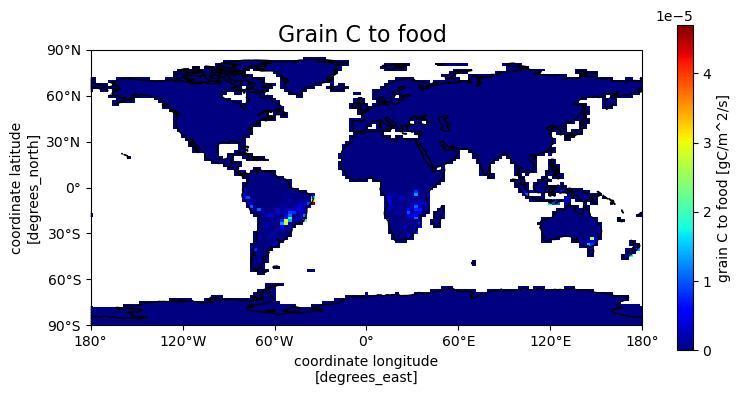

In [10]:
fig, axs = plt.subplots(figsize=(8,4), subplot_kw={'projection': ccrs.PlateCarree()})
#(np.multiply(dset_case2['NEE'], area_grid)/np.sum(area_grid)).plot(cmap='jet',vmin=vmin,vmax=vmax)
dset_case2['GRAINC_TO_FOOD'].plot(cmap='jet')

axs.coastlines(linewidth=1)
axs.set_xticks(np.arange(-180,181,60), crs=ccrs.PlateCarree())
lon_formatter = cticker.LongitudeFormatter()
axs.xaxis.set_major_formatter(lon_formatter)
axs.set_yticks(np.arange(-90,91,30), crs=ccrs.PlateCarree())
lat_formatter = cticker.LatitudeFormatter()
axs.yaxis.set_major_formatter(lat_formatter) 
axs.set_title('Grain C to food ', fontsize=16, loc='center')      
fig.tight_layout()

print(np.sum(np.multiply(dset_case2['GRAINC_TO_FOOD'], area_grid)/np.sum(area_grid)).round(decimals = 2))
#print(float(np.sum(np.multiply(dset_case2['NEE'], area_grid)/np.sum(area_grid))))
dset_case2['GRAINC_TO_FOOD'].max()

In [5]:
dset_case2

<xarray.Dataset>
Dimensions:                  (levgrnd: 25, levlak: 10, levdcmp: 25, time: 1,
                              hist_interval: 2, lon: 144, lat: 96, levsoi: 20,
                              cft: 64, glc_nec: 10, ltype: 9, natpft: 15,
                              nvegwcs: 4)
Coordinates:
  * levgrnd                  (levgrnd) float64 0.01 0.04 0.09 ... 28.87 42.0
  * levlak                   (levlak) float64 0.05 0.6 2.1 ... 25.6 34.33 44.77
  * levdcmp                  (levdcmp) float64 0.01 0.04 0.09 ... 28.87 42.0
  * time                     (time) float64 31.0
  * lon                      (lon) float64 0.0 2.5 5.0 7.5 ... 352.5 355.0 357.5
  * lat                      (lat) float64 -90.0 -88.11 -86.21 ... 88.11 90.0
Dimensions without coordinates: hist_interval, levsoi, cft, glc_nec, ltype,
                                natpft, nvegwcs
Data variables: (12/484)
    mcdate                   (time) int32 ...
    mcsec                    (time) int32 ...
    mdcur                    (time) int32 ...
    mscur                    (time) int32 ...
    nstep                    (time) int32 ...
    time_bounds              (time, hist_interval) float64 ...
    ...                       ...
    XSMRPOOL                 (time, lat, lon) float64 ...
    XSMRPOOL_RECOVER         (time, lat, lon) float64 ...
    ZBOT                     (time, lat, lon) float64 ...
    ZWT                      (time, lat, lon) float64 ...
    ZWT_CH4_UNSAT            (time, lat, lon) float64 ...
    ZWT_PERCH                (time, lat, lon) float64 ...
Attributes: (12/100)
    title:                                     CLM History file information
    comment:                                   NOTE: None of the variables ar...
    Conventions:                               CF-1.0
    history:                                   created on 02/10/23 20:43:09
    source:                                    Community Land Model CLM4.0
    hostname:                                  betzy
    ...                                        ...
    cft_irrigated_switchgrass:                 60
    cft_tropical_corn:                         61
    cft_irrigated_tropical_corn:               62
    cft_tropical_soybean:                      63
    cft_irrigated_tropical_soybean:            64
    time_period_freq:                          month_1

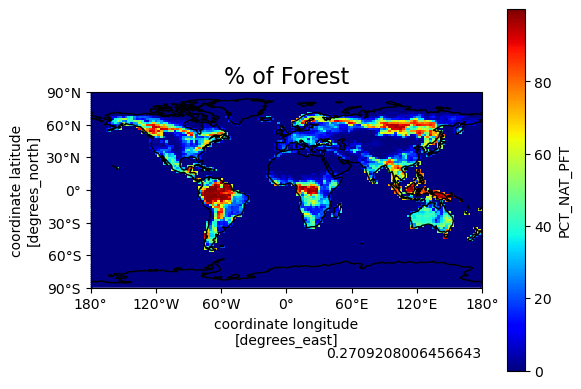

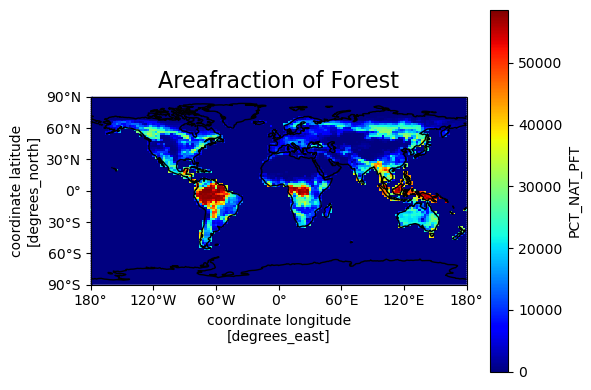

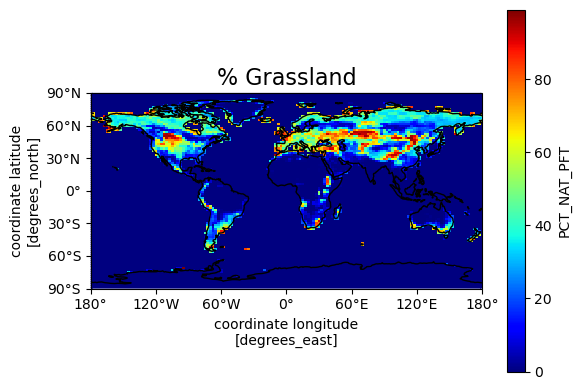

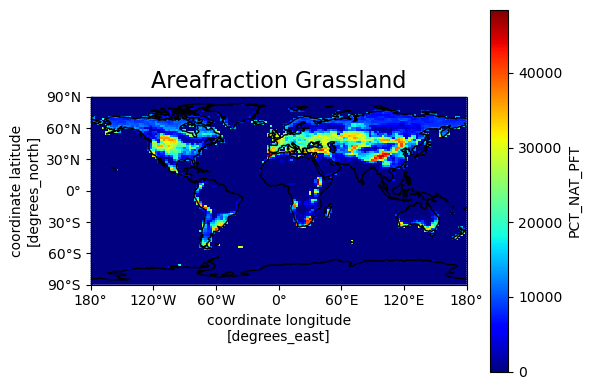

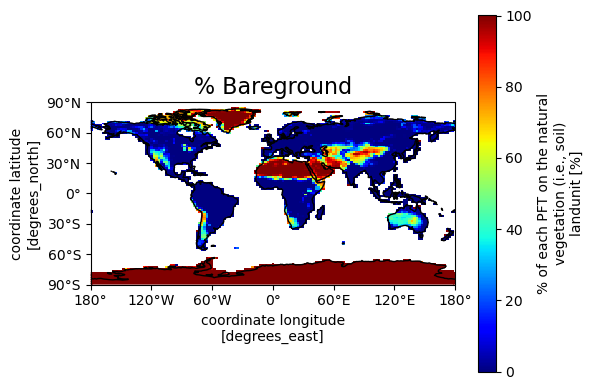

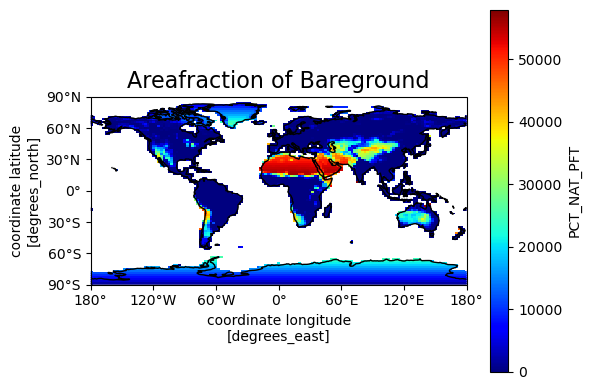

In [5]:
var = ['PCT_NAT_PFT', 'PCT_LANDUNIT','PCT_CFT']
variables = (np.multiply((dset_case2[var]/100), dset_case2['area'])) # converting to area fraction

fig, axs = plt.subplots(figsize=(6,4), subplot_kw={'projection': ccrs.PlateCarree()})
dset_case2['PCT_NAT_PFT'][:,2:11].sum(dim='natpft').plot(cmap='jet',)
axs.coastlines(linewidth=1)
axs.set_xticks(np.arange(-180,181,60), crs=ccrs.PlateCarree())
lon_formatter = cticker.LongitudeFormatter()
axs.xaxis.set_major_formatter(lon_formatter)
axs.set_yticks(np.arange(-90,91,30), crs=ccrs.PlateCarree())
lat_formatter = cticker.LatitudeFormatter()
axs.yaxis.set_major_formatter(lat_formatter) 
axs.set_title('% of Forest', fontsize=16, loc='center')      
plt.text(0.8, -0.3, float((np.sum(variables['PCT_NAT_PFT'][:,2:11].sum(dim='natpft')))/(np.sum(area_grid))), fontsize=10, color='k', ha='center', va='top',transform=plt.gca().transAxes);
fig.tight_layout()

fig, axs = plt.subplots(figsize=(6,4), subplot_kw={'projection': ccrs.PlateCarree()})
variables['PCT_NAT_PFT'][:,2:11].sum(dim='natpft').plot(cmap='jet',)
axs.coastlines(linewidth=1)
axs.set_xticks(np.arange(-180,181,60), crs=ccrs.PlateCarree())
lon_formatter = cticker.LongitudeFormatter()
axs.xaxis.set_major_formatter(lon_formatter)
axs.set_yticks(np.arange(-90,91,30), crs=ccrs.PlateCarree())
lat_formatter = cticker.LatitudeFormatter()
axs.yaxis.set_major_formatter(lat_formatter) 
axs.set_title('Areafraction of Forest', fontsize=16, loc='center')      
fig.tight_layout()



fig, axs = plt.subplots(figsize=(6,4), subplot_kw={'projection': ccrs.PlateCarree()})
dset_case2['PCT_NAT_PFT'][:,12:14].sum(dim='natpft').plot(cmap='jet',)
axs.coastlines(linewidth=1)
axs.set_xticks(np.arange(-180,181,60), crs=ccrs.PlateCarree())
lon_formatter = cticker.LongitudeFormatter()
axs.xaxis.set_major_formatter(lon_formatter)
axs.set_yticks(np.arange(-90,91,30), crs=ccrs.PlateCarree())
lat_formatter = cticker.LatitudeFormatter()
axs.yaxis.set_major_formatter(lat_formatter) 
axs.set_title('% Grassland', fontsize=16, loc='center')      
fig.tight_layout()

fig, axs = plt.subplots(figsize=(6,4), subplot_kw={'projection': ccrs.PlateCarree()})
variables['PCT_NAT_PFT'][:,12:14].sum(dim='natpft').plot(cmap='jet',)
axs.coastlines(linewidth=1)
axs.set_xticks(np.arange(-180,181,60), crs=ccrs.PlateCarree())
lon_formatter = cticker.LongitudeFormatter()
axs.xaxis.set_major_formatter(lon_formatter)
axs.set_yticks(np.arange(-90,91,30), crs=ccrs.PlateCarree())
lat_formatter = cticker.LatitudeFormatter()
axs.yaxis.set_major_formatter(lat_formatter) 
axs.set_title('Areafraction Grassland', fontsize=16, loc='center')      
fig.tight_layout()

fig, axs = plt.subplots(figsize=(6,4), subplot_kw={'projection': ccrs.PlateCarree()})
dset_case2['PCT_NAT_PFT'].isel(natpft=0).plot(cmap='jet',)
axs.coastlines(linewidth=1)
axs.set_xticks(np.arange(-180,181,60), crs=ccrs.PlateCarree())
lon_formatter = cticker.LongitudeFormatter()
axs.xaxis.set_major_formatter(lon_formatter)
axs.set_yticks(np.arange(-90,91,30), crs=ccrs.PlateCarree())
lat_formatter = cticker.LatitudeFormatter()
axs.yaxis.set_major_formatter(lat_formatter) 
axs.set_title('% Bareground', fontsize=16, loc='center')      
fig.tight_layout()


fig, axs = plt.subplots(figsize=(6,4), subplot_kw={'projection': ccrs.PlateCarree()})
variables['PCT_NAT_PFT'].isel(natpft=0).plot(cmap='jet',)
axs.coastlines(linewidth=1)
axs.set_xticks(np.arange(-180,181,60), crs=ccrs.PlateCarree())
lon_formatter = cticker.LongitudeFormatter()
axs.xaxis.set_major_formatter(lon_formatter)
axs.set_yticks(np.arange(-90,91,30), crs=ccrs.PlateCarree())
lat_formatter = cticker.LatitudeFormatter()
axs.yaxis.set_major_formatter(lat_formatter) 
axs.set_title('Areafraction of Bareground', fontsize=16, loc='center')      
fig.tight_layout()


#dset_case2['PCT_LANDUNIT'].plot()

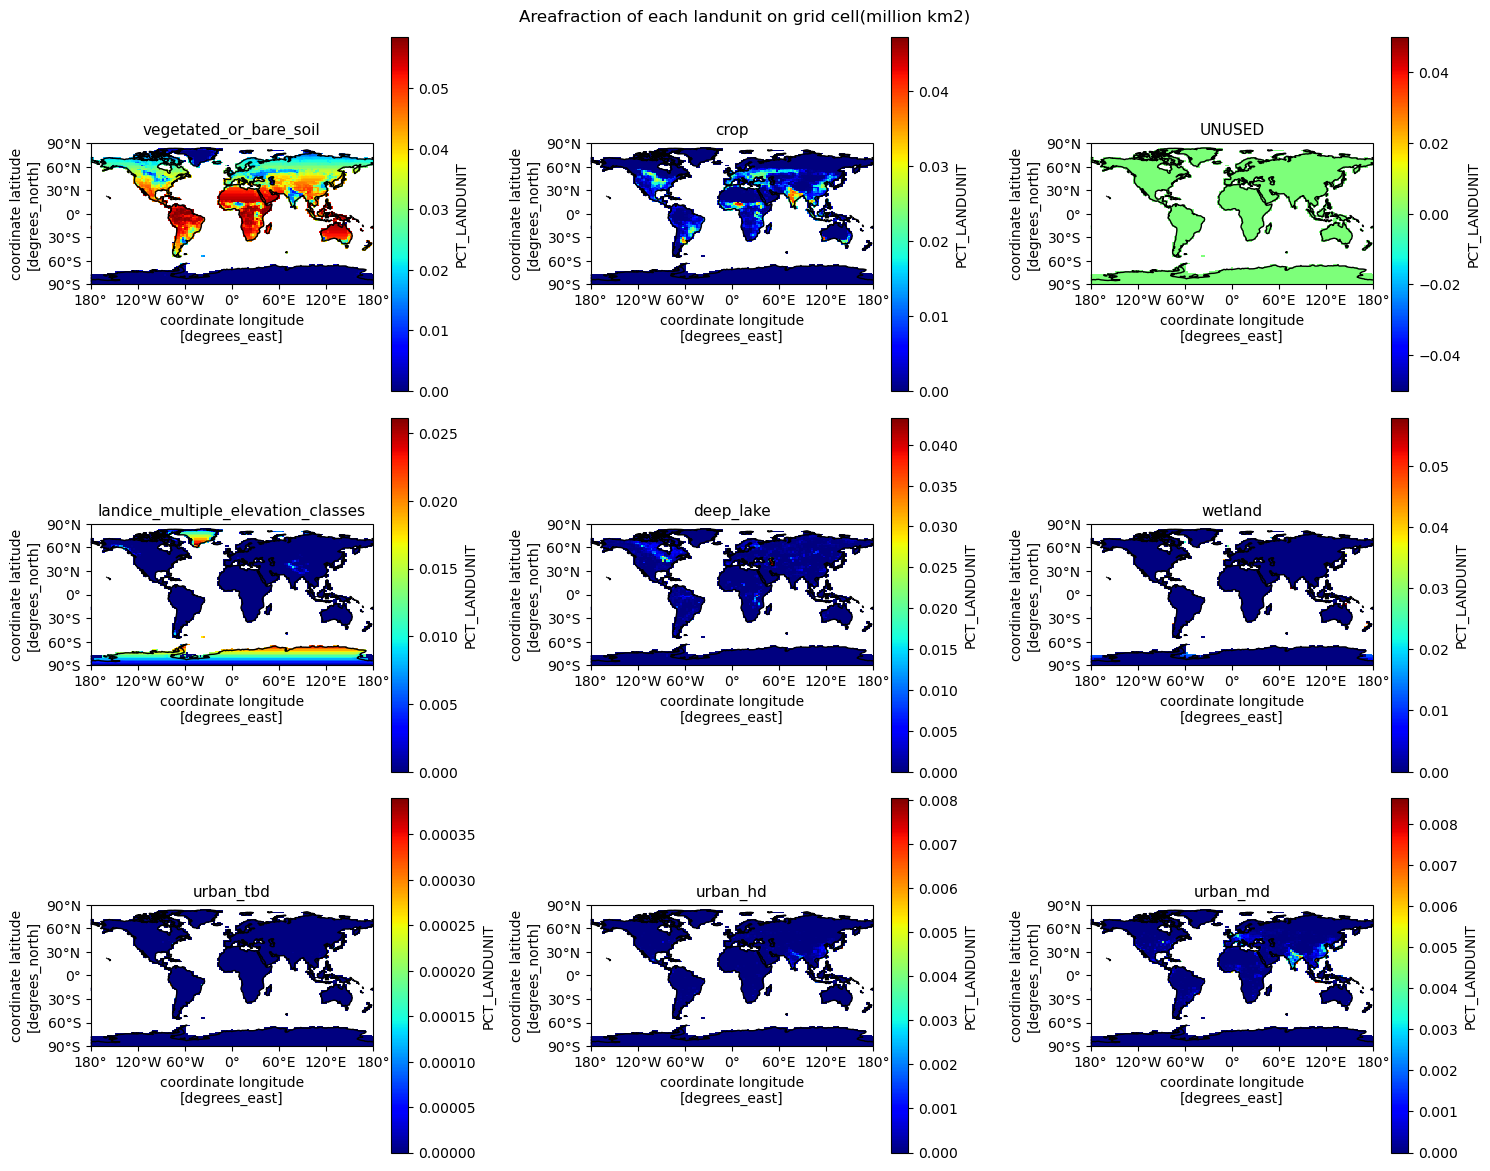

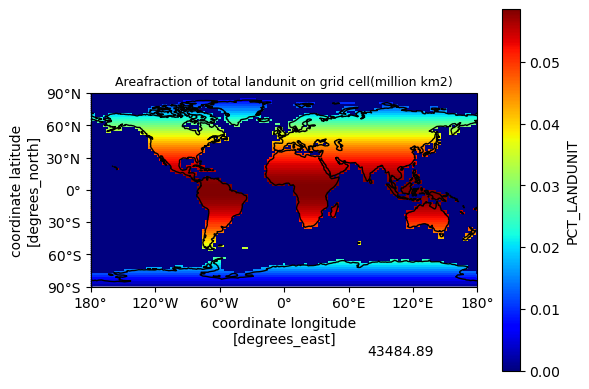

In [6]:
Itype=['vegetated_or_bare_soil','crop','UNUSED', 'landice_multiple_elevation_classes','deep_lake','wetland','urban_tbd', 'urban_hd', 'urban_md']
#for k in range(len(Itype)): 
fig, axs = plt.subplots(3, 3, figsize=(15, 15), subplot_kw={'projection': ccrs.PlateCarree()},sharex=True, sharey=True)
axs = axs.flatten()
for i in range(9):
    #fig, axs = plt.subplots(figsize=(6,4), subplot_kw={'projection': ccrs.PlateCarree()})
    (variables['PCT_LANDUNIT'].isel(ltype=i)/1e6).plot(ax=axs[i], transform=ccrs.PlateCarree(),
                                cbar_kwargs={'shrink': 0.5}, cmap='jet')
    axs[i].coastlines(linewidth=1)
    axs[i].set_xticks(np.arange(-180,181,60), crs=ccrs.PlateCarree())
    lon_formatter = cticker.LongitudeFormatter()
    axs[i].xaxis.set_major_formatter(lon_formatter)
    axs[i].set_yticks(np.arange(-90,91,30), crs=ccrs.PlateCarree())
    lat_formatter = cticker.LatitudeFormatter()
    axs[i].yaxis.set_major_formatter(lat_formatter) 
    axs[i].set_title( Itype[i], fontsize=11, loc='center') 
    #plt.text(0.8, -0.3, float(np.sum(np.multiply((variables['PCT_LANDUNIT']).isel(ltype=i), area_grid)/np.sum(area_grid))), fontsize=10, color='k', ha='center', va='top',transform=plt.gca().transAxes);  
    fig.tight_layout()
fig.suptitle("Areafraction of each landunit on grid cell(million km2)",  y=0.89)  
fig, axs = plt.subplots(figsize=(6,4), subplot_kw={'projection': ccrs.PlateCarree()})
((variables['PCT_LANDUNIT'].sum(dim='ltype'))/1e6).plot(cmap='jet',)
axs.coastlines(linewidth=1)
axs.set_xticks(np.arange(-180,181,60), crs=ccrs.PlateCarree())
lon_formatter = cticker.LongitudeFormatter()
axs.xaxis.set_major_formatter(lon_formatter)
axs.set_yticks(np.arange(-90,91,30), crs=ccrs.PlateCarree())
lat_formatter = cticker.LatitudeFormatter()
axs.yaxis.set_major_formatter(lat_formatter) 
axs.set_title('Areafraction of total landunit on grid cell(million km2)', fontsize=9, loc='center')  
sumland=variables['PCT_LANDUNIT'].sum(dim='ltype')    
plt.text(0.8, -0.3, round(float(np.sum(np.multiply(sumland, area_grid)/np.sum(area_grid))),2), fontsize=10, color='k', ha='center', va='top',transform=plt.gca().transAxes);  
fig.tight_layout()

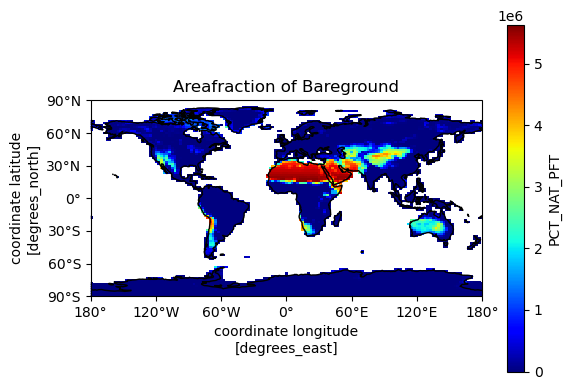

In [7]:
fig, axs = plt.subplots(figsize=(6,4), subplot_kw={'projection': ccrs.PlateCarree()})
var_gridcell = np.multiply(dset_case2['PCT_NAT_PFT'].isel(natpft=0),dset_case2['PCT_LANDUNIT'].isel(ltype=0))
np.multiply((var_gridcell/100),dset_case2['area']).plot(cmap='jet',)
axs.coastlines(linewidth=1)
axs.set_xticks(np.arange(-180,181,60), crs=ccrs.PlateCarree())
lon_formatter = cticker.LongitudeFormatter()
axs.xaxis.set_major_formatter(lon_formatter)
axs.set_yticks(np.arange(-90,91,30), crs=ccrs.PlateCarree())
lat_formatter = cticker.LatitudeFormatter()
axs.yaxis.set_major_formatter(lat_formatter) 
axs.set_title('Areafraction of Bareground', fontsize=12, loc='center')      
fig.tight_layout()

#np.multiply((dset_case2[var]/100), dset_case2['area'])


[[<GeoAxesSubplot: > <GeoAxesSubplot: > <GeoAxesSubplot: >
  <GeoAxesSubplot: >]
 [<GeoAxesSubplot: > <GeoAxesSubplot: > <GeoAxesSubplot: >
  <GeoAxesSubplot: >]
 [<GeoAxesSubplot: > <GeoAxesSubplot: > <GeoAxesSubplot: >
  <GeoAxesSubplot: >]
 [<GeoAxesSubplot: > <GeoAxesSubplot: > <GeoAxesSubplot: >
  <GeoAxesSubplot: >]]


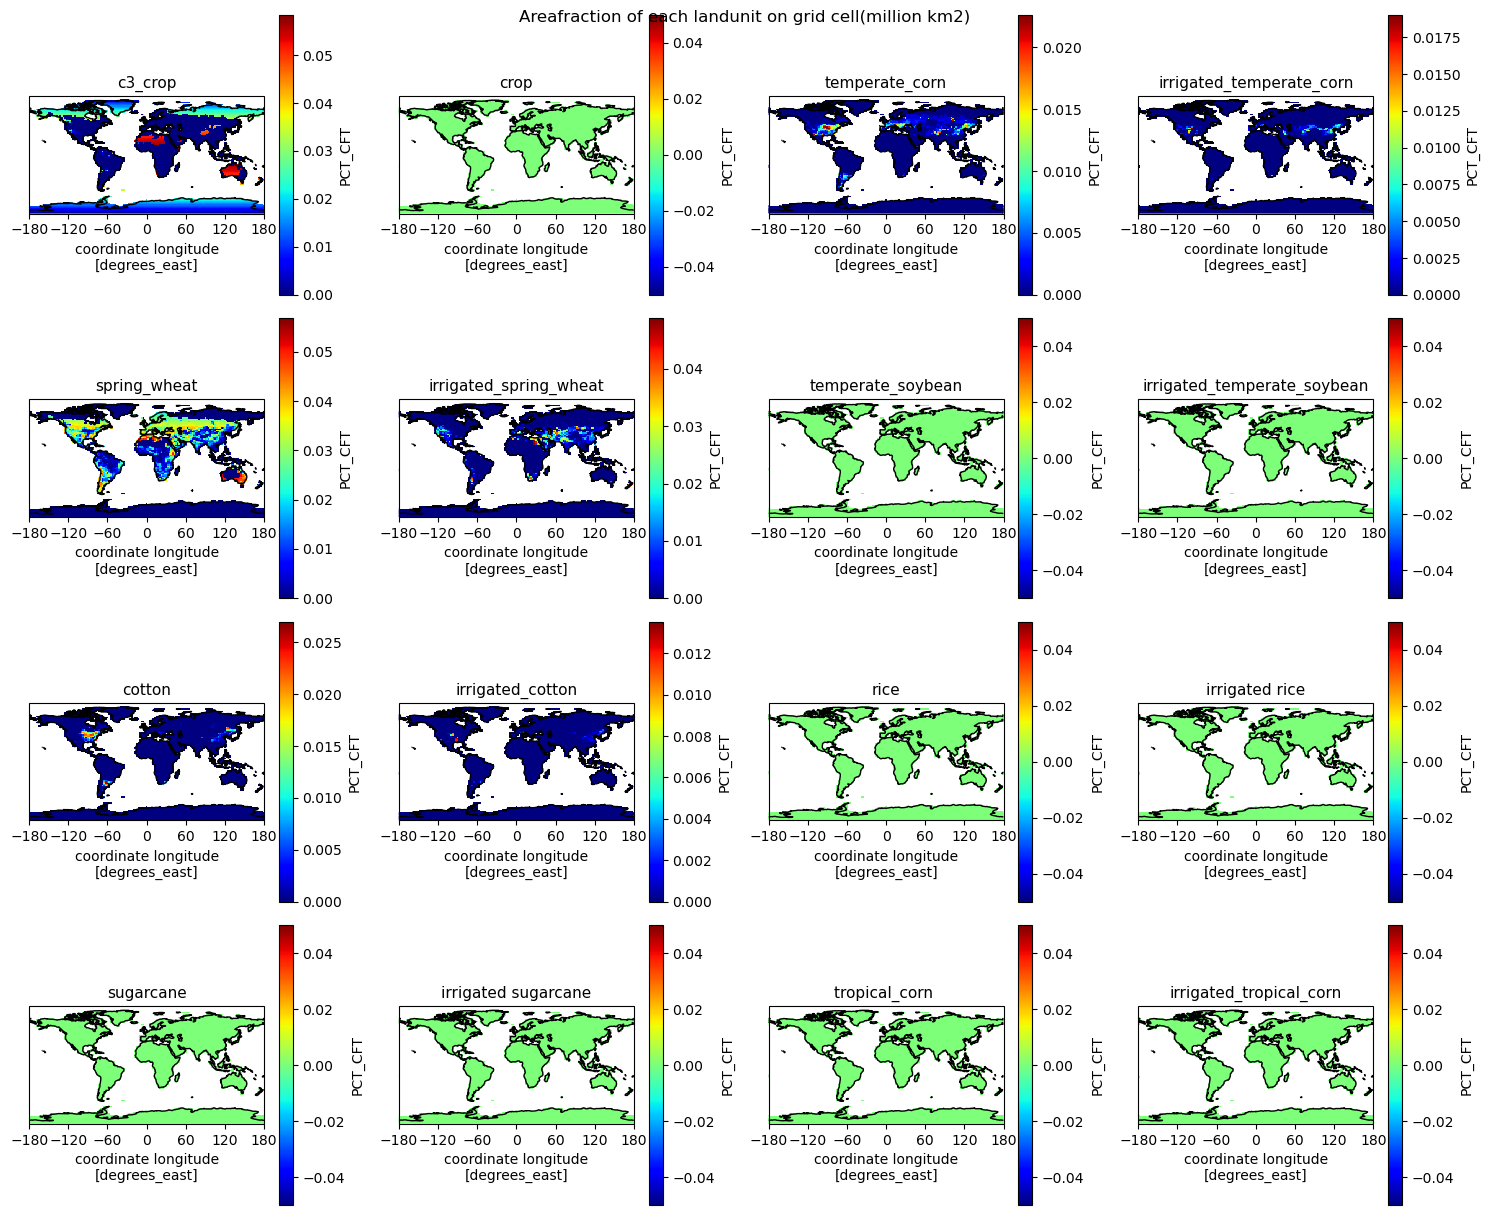

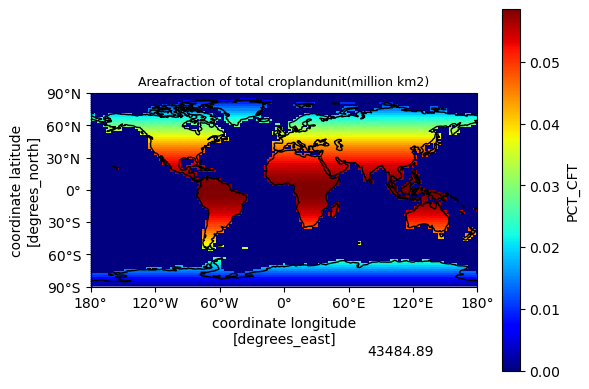

In [8]:

a=variables['PCT_CFT'].sum(['lat','lon'])
nonzero_index = np.argwhere(a.values != 0)
#print(len(nonzero_index))
Itype=['c3_crop','crop','temperate_corn', 'irrigated_temperate_corn','spring_wheat','irrigated_spring_wheat','temperate_soybean', 'irrigated_temperate_soybean', 'cotton','irrigated_cotton','rice', 'irrigated rice','sugarcane','irrigated sugarcane', 'tropical_corn ', 'irrigated_tropical_corn','tropical_soybean','irrigated_tropical_soybean']


#for k in range(len(Itype)): 
fig, axs = plt.subplots(4,4, figsize=(15, 15), subplot_kw={'projection': ccrs.PlateCarree()},sharex=True, sharey=True)
print(axs)
axs = axs.flatten()
for i in range(len(nonzero_index)-1):
    #fig, axs = plt.subplots(figsize=(4,4), subplot_kw={'projection': ccrs.PlateCarree()})
    (variables['PCT_CFT'].isel(cft=i)/1e6).plot(ax=axs[i], transform=ccrs.PlateCarree(),
                                cbar_kwargs={'shrink': 0.5}, cmap='jet')
    axs[i].coastlines(linewidth=1)
    axs[i].set_xticks(np.arange(-180,181,60), crs=ccrs.PlateCarree())
    #lon_formatter = cticker.LongitudeFormatter()
    #axs[i].xaxis.set_major_formatter(lon_formatter)
    #axs[i].set_yticks(np.arange(-90,91,30), crs=ccrs.PlateCarree())
    #lat_formatter = cticker.LatitudeFormatter()
    #axs[i].yaxis.set_major_formatter(lat_formatter) 
    axs[i].set_title( Itype[i], fontsize=11, loc='center') 
    #plt.text(0.8, -0.3, float(np.sum(np.multiply((variables['PCT_LANDUNIT']).isel(ltype=i), area_grid)/np.sum(area_grid))), fontsize=10, color='k', ha='center', va='top',transform=plt.gca().transAxes);  
    fig.tight_layout()
fig.suptitle("Areafraction of each landunit on grid cell(million km2)",  y=.90)   

fig, axs = plt.subplots(figsize=(6,4), subplot_kw={'projection': ccrs.PlateCarree()})
((variables['PCT_CFT'].sum(dim='cft'))/1e6).plot(cmap='jet',)
axs.coastlines(linewidth=1)
axs.set_xticks(np.arange(-180,181,60), crs=ccrs.PlateCarree())
lon_formatter = cticker.LongitudeFormatter()
axs.xaxis.set_major_formatter(lon_formatter)
axs.set_yticks(np.arange(-90,91,30), crs=ccrs.PlateCarree())
lat_formatter = cticker.LatitudeFormatter()
axs.yaxis.set_major_formatter(lat_formatter) 
axs.set_title('Areafraction of total croplandunit(million km2)', fontsize=9, loc='center')  
sumcrop=variables['PCT_CFT'].sum(dim='cft')    
plt.text(0.8, -0.3, round(float(np.sum(np.multiply(sumcrop, area_grid)/np.sum(area_grid))),2), fontsize=10, color='k', ha='center', va='top',transform=plt.gca().transAxes);  
fig.tight_layout() 
    

In [18]:
dset_case2['PCT_CFT']

<xarray.DataArray 'PCT_CFT' (time: 1, cft: 64, lat: 96, lon: 144)>
array([[[[100., ..., 100.],
         ...,
         [ nan, ...,  nan]],

        ...,

        [[  0., ...,   0.],
         ...,
         [ nan, ...,  nan]]]])
Coordinates:
  * time     (time) float64 31.0
  * lon      (lon) float64 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
  * lat      (lat) float64 -90.0 -88.11 -86.21 -84.32 ... 84.32 86.21 88.11 90.0
Dimensions without coordinates: cft
Attributes:
    long_name:     % of each crop on the crop landunit
    units:         %
    cell_methods:  time: mean

In [17]:
variables['PCT_CFT']

<xarray.DataArray 'PCT_CFT' (time: 1, cft: 64, lat: 96, lon: 144)>
array([[[[ 242.11140042,  242.11140042,  242.11140042, ...,
           242.11140042,  242.11140042,  242.11140042],
         [1936.49403867, 1936.49403867, 1936.49403867, ...,
          1936.49403867, 1936.49403867, 1936.49403867],
         [3870.87056305, 3870.87056305, 3870.87056305, ...,
          3870.87056305, 3870.87056305, 3870.87056305],
         ...,
         [          nan,           nan,           nan, ...,
                    nan,           nan,           nan],
         [          nan,           nan,           nan, ...,
                    nan,           nan,           nan],
         [          nan,           nan,           nan, ...,
                    nan,           nan,           nan]],

        [[   0.        ,    0.        ,    0.        , ...,
             0.        ,    0.        ,    0.        ],
         [   0.        ,    0.        ,    0.        , ...,
             0.        ,    0.        ,    0.        ],
         [   0.        ,    0.        ,    0.        , ...,
             0.        ,    0.        ,    0.        ],
...
         [          nan,           nan,           nan, ...,
                    nan,           nan,           nan],
         [          nan,           nan,           nan, ...,
                    nan,           nan,           nan],
         [          nan,           nan,           nan, ...,
                    nan,           nan,           nan]],

        [[   0.        ,    0.        ,    0.        , ...,
             0.        ,    0.        ,    0.        ],
         [   0.        ,    0.        ,    0.        , ...,
             0.        ,    0.        ,    0.        ],
         [   0.        ,    0.        ,    0.        , ...,
             0.        ,    0.        ,    0.        ],
         ...,
         [          nan,           nan,           nan, ...,
                    nan,           nan,           nan],
         [          nan,           nan,           nan, ...,
                    nan,           nan,           nan],
         [          nan,           nan,           nan, ...,
                    nan,           nan,           nan]]]])
Coordinates:
  * time     (time) float64 31.0
  * lon      (lon) float64 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
  * lat      (lat) float64 -90.0 -88.11 -86.21 -84.32 ... 84.32 86.21 88.11 90.0
Dimensions without coordinates: cft

In [87]:
dset_case2.attrs

<bound method DataWithCoords.assign_attrs of <xarray.Dataset>
Dimensions:                  (levgrnd: 25, levlak: 10, levdcmp: 25, time: 1,
                              hist_interval: 2, lon: 144, lat: 96, levsoi: 20,
                              cft: 64, glc_nec: 10, ltype: 9, natpft: 15,
                              nvegwcs: 4)
Coordinates:
  * levgrnd                  (levgrnd) float64 0.01 0.04 0.09 ... 28.87 42.0
  * levlak                   (levlak) float64 0.05 0.6 2.1 ... 25.6 34.33 44.77
  * levdcmp                  (levdcmp) float64 0.01 0.04 0.09 ... 28.87 42.0
  * time                     (time) float64 31.0
  * lon                      (lon) float64 0.0 2.5 5.0 7.5 ... 352.5 355.0 357.5
  * lat                      (lat) float64 -90.0 -88.11 -86.21 ... 88.11 90.0
Dimensions without coordinates: hist_interval, levsoi, cft, glc_nec, ltype,
                                natpft, nvegwcs
Data variables: (12/476)
    mcdate                   (time) int32 ...
    mcsec       

In [19]:
a=variables['PCT_CFT'].sum(['lat','lon'])
nonzero_index = np.argwhere(a.values != 0)